O seguinte código tem como objetivo melhorar meu conhecimento e habilidades em progamação de Machine Learning (ML) no python, fazendo uma análise exploratória da base de dados (Iris Species) encontrada no website kaggle e avaliar a diferença entre os tipos de modelos supervisionados encontrados na biblioteca scikit-learn.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
pwd

'C:\\Users\\marki'

In [41]:
iris = pd.read_csv(r"C:\Users\marki\Downloads\Iris.csv")

In [42]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [44]:
iris.drop("Id", axis=1,inplace = True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
iris.shape

(150, 5)

Número de linhas e colunas do DataFrase.
Há 150 linhas e 5 colunas.

In [46]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Os dados estão completos e não há nenhum tipo de valor nulo na tabela. 

Há 4 colunas numéricas e 1 do tipo str.

In [47]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Mostra as estatísticas básicas dos dados: Número de valores em cada coluna, Média, Desvio Padrão, Valor mínimo, Quartis e Valor maxímo.

In [48]:
iris.groupby("Species").size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Agrupa as linhas dos dados.

Há 3 tipos de espécies: 
50 Iris-versicolor
50 Iris-virginica
50 Iris-versicolor

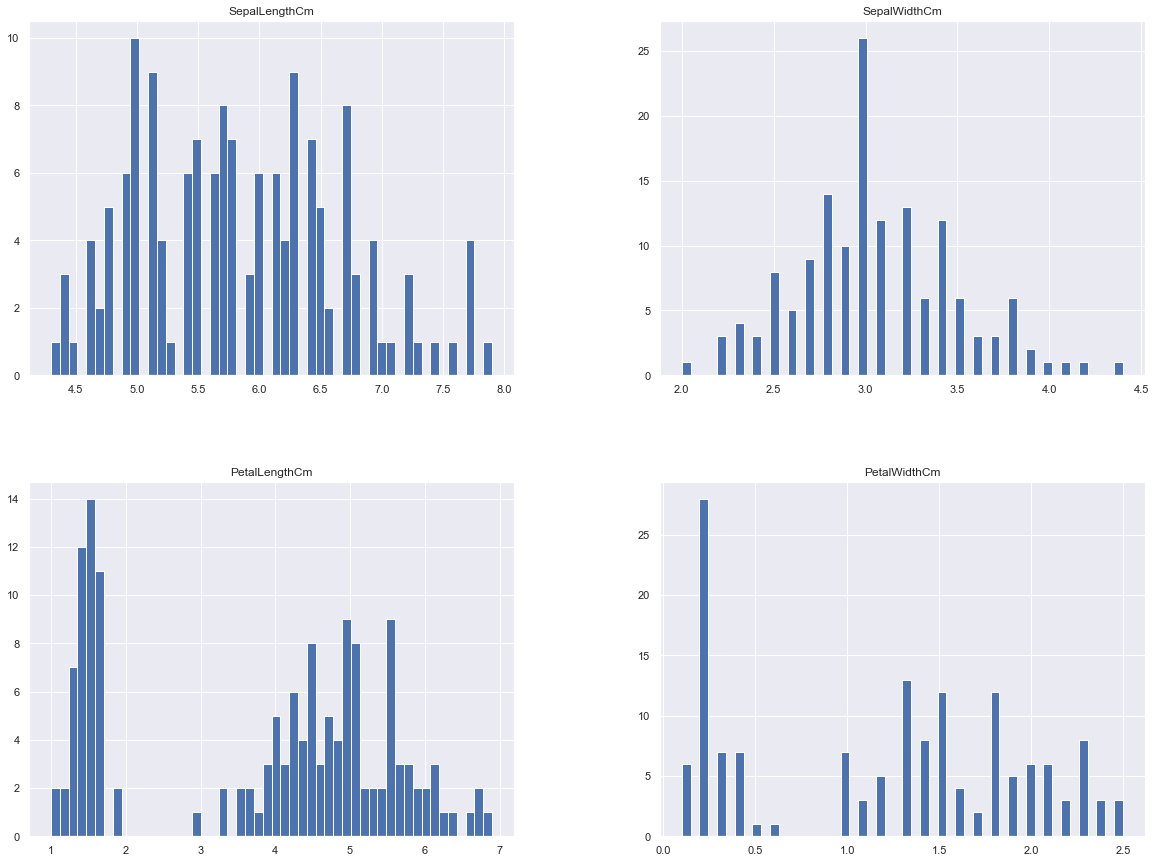

In [49]:
iris.hist(bins=50, figsize=(20,15));

Esse gráfico retorna a frequência dos valores de cada coluna numérica do DataFrame.

1) SepalLengthCm

Grande parte dos valores estão entre os valores de 4.5 e 7.0

2)SepalWidhtCm

Grande parte dos dados estão entre 2.5 e 3.5, havendo um pico de flores que tem o SepalWidht em 3.0 cm

3)PetalLengthCm

Não há flores de 2.0 até quase 3.0 Cm

4)PetalWidthCm

Os valores estão até bem divididos, com exceção da medida de 0.2 que tem quase 30 flores com essa espessura. Não há flores com medidas entre 0.7 e 0.9 Cm


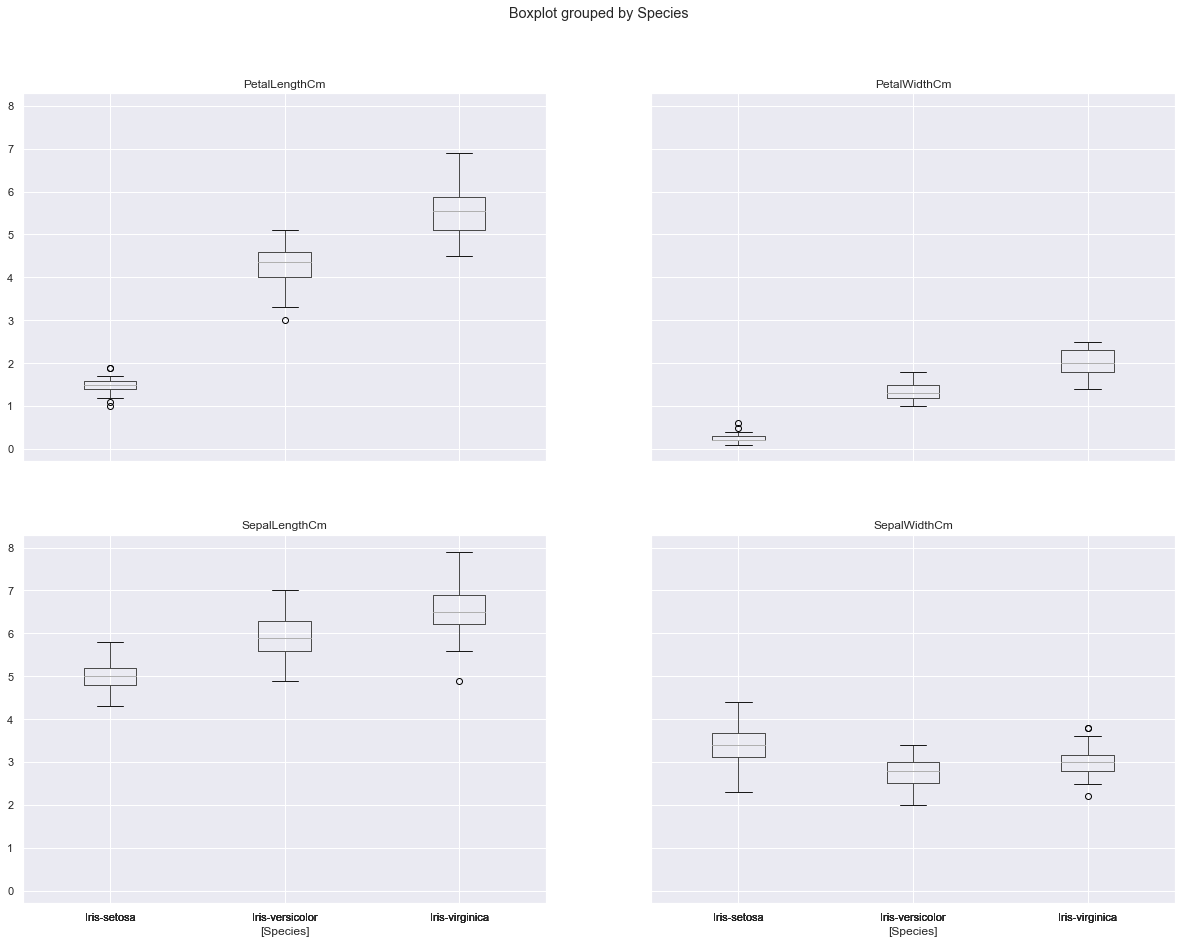

In [50]:
iris.boxplot(by='Species', figsize=(20,15));

 Em relação ao tamanho e a espessura da pétala, a Iris-virginica é maior e a Iris-setosa é menor.
 Em relação ao tamanho da sépala, a Iris-virginica é maior. 
 Em relação à espessura da sépala, a Iris-setosa é maior.

Iris-setosa é a espécie que os dados são mais parecidos fazendo com que seu bloxplot seja menor em relação as outras espécies, menos na medida Sepal Widht.

Há alguns outliers nas espécies. 

Mostra a medida da Iris-setosa é menor as outras espécies em quase todas as medidas, exceto na medida Sepal WidthCm em que os valores dela são maiores que as outras espécies. Mostra que a Iris-Virginica tem as maiores medidas de PetalLenghtCm, PetalWidthCm e SepalLengthCm. 

Portanto, não se pode concluir que uma espécie tem suas medidas menores que as outras espécies ou que uma espécie tem suas medidas maiores que aas outras espécies.

In [51]:
import seaborn as sns

# Apply the default theme
sns.set_theme()

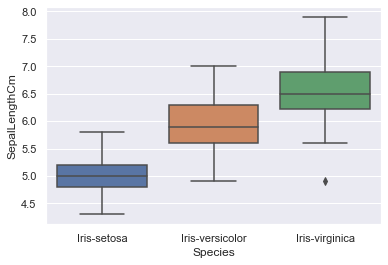

In [52]:
d1 = sns.boxplot(x = 'Species', y='SepalLengthCm', data = iris);

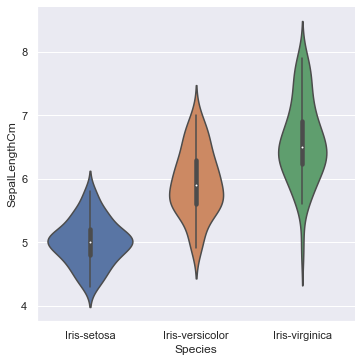

In [53]:
sns.catplot(data=iris, kind="violin",x = 'Species',y='SepalLengthCm', split=True);

In [54]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Retorna a correlação (Coeficiente de Correlação de Pearson).
Observa-se uma grande correlação entre o tamanho e espessura da pétala (0.962757).
Observa-se uma grande correlação entre o tamanho da pétala e tamanho da sépala (0.871754).

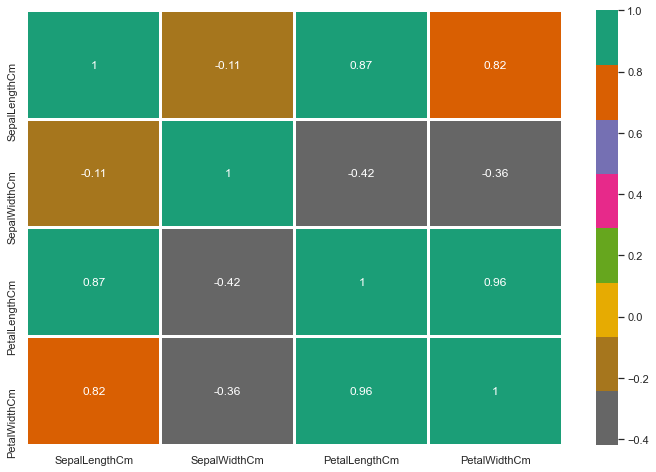

In [55]:
plt.figure(figsize=(12,8)) 
sns.heatmap(iris.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

Mostra que existem correlações bem forte entre algumas medidas. Principalmente entre: PetalWidthCm e PetalLength, PetalLendth e SepalLendth. Existe uma correlação também, mais fraca mas não menor importante, entre PetalWidth e SepalLength

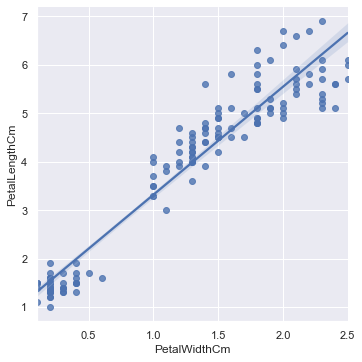

In [56]:
d1 = sns.lmplot(x = 'PetalWidthCm' ,y='PetalLengthCm', data = iris)

Verifica uma boa relação entre PetalLength e PetalWidth

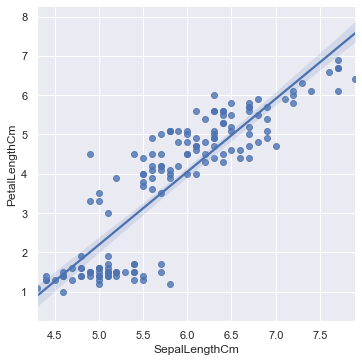

In [57]:
d1 = sns.lmplot(x = 'SepalLengthCm' ,y='PetalLengthCm', data = iris)

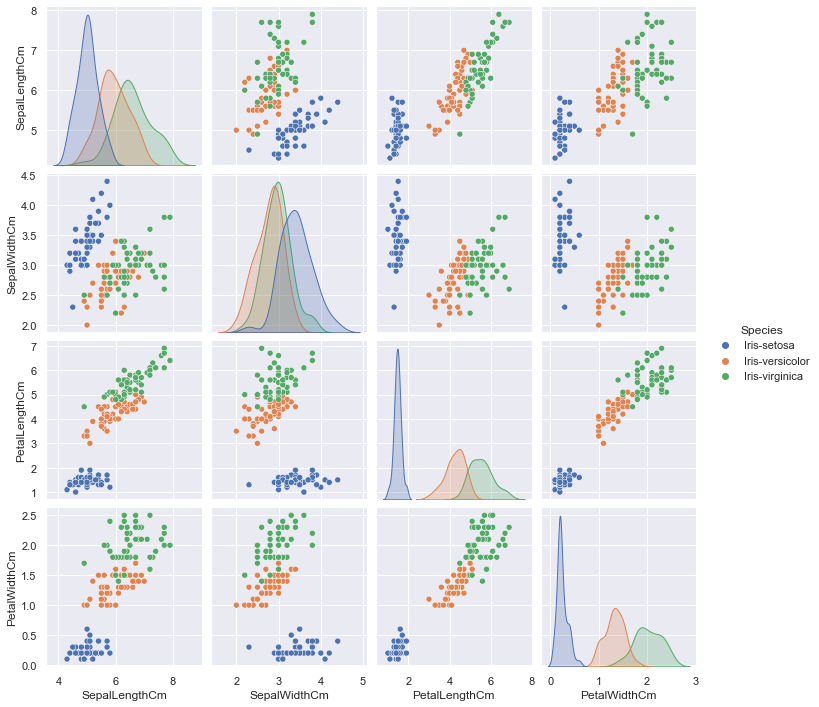

In [59]:
sns.pairplot(data=iris, hue="Species")

Mostra que nas medidas que existem as correlações, os valores da Iris-setosa é sempre menor em relação as outras espécies, enquanto a Iris-versicolor é pouco menor do que a espécie Iris-virginica

Criando combinações de atributos:

In [60]:
iris['PetalLength_per_PetalWidth'] = iris['PetalLengthCm'] / iris['PetalWidthCm']
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PetalLength_per_PetalWidth
0,5.1,3.5,1.4,0.2,Iris-setosa,7.000000
1,4.9,3.0,1.4,0.2,Iris-setosa,7.000000
2,4.7,3.2,1.3,0.2,Iris-setosa,6.500000
3,4.6,3.1,1.5,0.2,Iris-setosa,7.500000
4,5.0,3.6,1.4,0.2,Iris-setosa,7.000000
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2.260870
146,6.3,2.5,5.0,1.9,Iris-virginica,2.631579
147,6.5,3.0,5.2,2.0,Iris-virginica,2.600000
148,6.2,3.4,5.4,2.3,Iris-virginica,2.347826


Não houve melhora significativa nas correlações do novo atributo 

In [61]:
del iris['PetalLength_per_PetalWidth']
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Confusion Matrix e Classification_report são importados para criar um sumário
capaz de relatar a performace do aprendizado de maquina: TP,TN,FP,FN, acurácia, precisão, recall e f1-score.

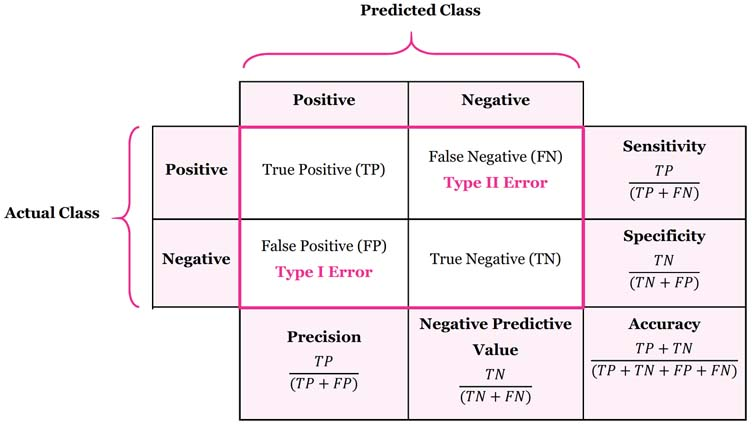

In [63]:
from IPython.display import Image
Image(r"C:\Users\marki\Downloads\confusion.jpg") 

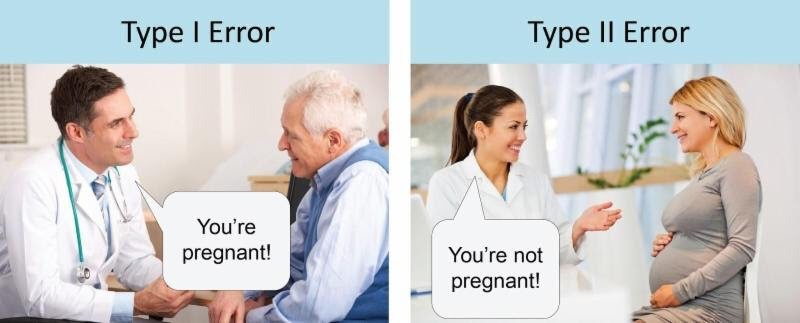

In [64]:
Image(r"C:\Users\marki\Downloads\error.jpg")

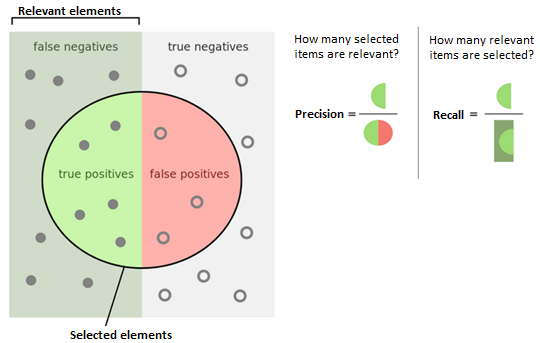

In [65]:
Image(r"C:\Users\marki\Downloads\f1.png")

# Treinando modelos 

In [66]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                     test_size = 0.3)

In [93]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [67]:
X_train.shape

(105, 4)

In [68]:
X_test.shape

(45, 4)

In [69]:
X.shape

(150, 4)

Aqui os dados são separados em duas partes, uma para teste, onde o modelo irá aprender com a porcentagem dos
dados que foram separados para isto( no caso 30% para teste ) e a outra para treino onde o modelo será realmente avaliado. O primeiro modelo a ser testato será o Support vector machines.

In [70]:
from sklearn import svm
model = svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.9555555555555556

O resultado da acurácia do modelo varia de acordo com a amostra selecionada
aleatoriamente. Portando será necessário utilizar o GridSearchCV para encontrar
o melhor parâmetro.

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
# clf = classification model: import the model that will be use.

clf = GridSearchCV(svm.SVC(gamma='auto'),{'C': [1,10,20],
    'kernel' : ['rbf','linear']
},cv=5)
clf.fit(X,y)
clf.cv_results_

{'mean_fit_time': array([0.00079966, 0.00058975, 0.00081067, 0.00040398, 0.00080004,
        0.00061049]),
 'std_fit_time': array([0.00040127, 0.00048191, 0.00040582, 0.00049481, 0.00040002,
        0.00049882]),
 'mean_score_time': array([0.00039983, 0.00039973, 0.00038958, 0.00060015, 0.00019989,
        0.00020003]),
 'std_score_time': array([0.00048969, 0.00048957, 0.00047742, 0.00049002, 0.00039978,
        0.00040007]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],


In [73]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000800,0.000401,0.00040,0.000490,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.000590,0.000482,0.00040,0.000490,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.000811,0.000406,0.00039,0.000477,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.000404,0.000495,0.00060,0.000490,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.000800,0.000400,0.00020,0.000400,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.000610,0.000499,0.00020,0.000400,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6


In [74]:
df.shape

(6, 15)

In [75]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667


In [76]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_

In [77]:
clf.best_score_

0.9800000000000001

In [78]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [79]:
# Using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, n_iter=3)
# n_inter = n of combinations

rs.fit(X,y)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,10,linear,0.973333
2,10,rbf,0.980000


Agora vamos testar mais dois modelos simultaneamente a este.

In [80]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']}  },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10] } },
    
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]  }}}

In [81]:

scores = []
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_ })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.960000,{'n_estimators': 5}
2,logistic_regression,0.966667,{'C': 5}


Podemos observar que o modelo:Support vector machines possui o maior score
entre os três modelos testados. Abaixo seram analizados outros modelos.

 O modelo seguinte será a Regressão Logística.
A regressão logística utiliza a probabilidade binária ( verdadeiro ou falso) Para classificar os dados,
sendo >50% = 1 e <50% = 0.

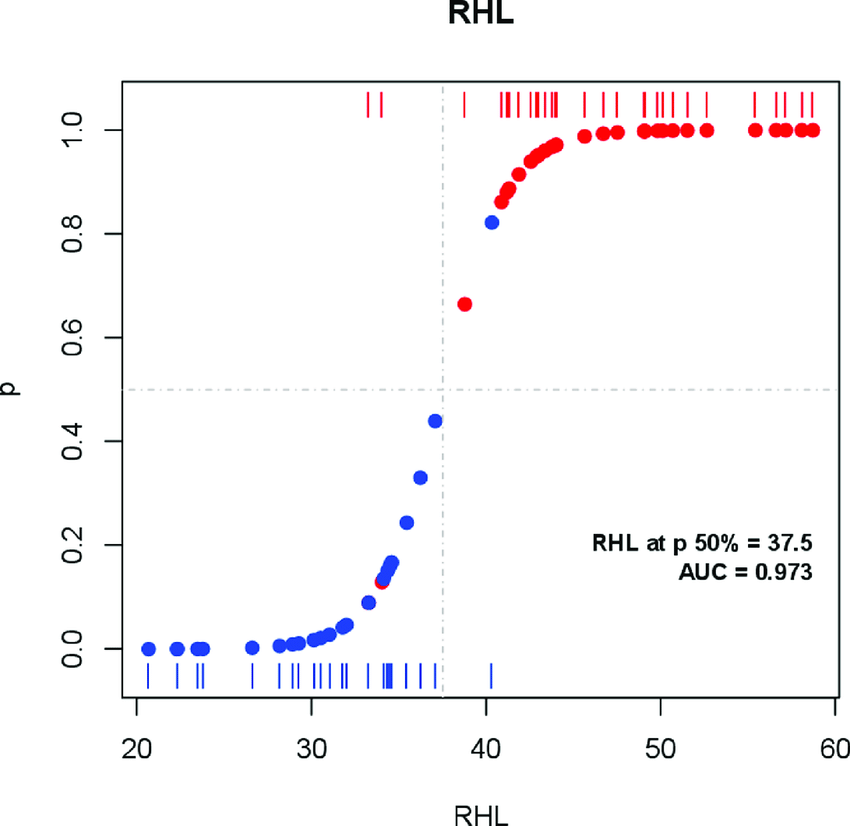

In [82]:
Image(r"C:\Users\marki\Downloads\logistic.png")

In [83]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear')
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('accuracy is', LRAcc)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.92      0.80      0.86        15
 Iris-virginica       0.85      0.94      0.89        18

       accuracy                           0.91        45
      macro avg       0.92      0.91      0.92        45
   weighted avg       0.91      0.91      0.91        45

[[12  0  0]
 [ 0 12  3]
 [ 0  1 17]]
accuracy is 0.9111111111111111


O f1-score da primeira e segunda espécie possuiram valores menos referêntes a primeira. É possível ajustarmos
os valores de treino e teste para alcançar um melhor resultado.

In [89]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                            random_state = 42)

In [90]:
X_train.shape

(120, 4)

In [91]:
X_test.shape

(30, 4)

In [ ]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear')
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRacc = accuracy_score(y_pred,y_test)
print('accuracy is', LRacc)

Utilizando 30% dos dados como teste, obtivemos uma melhora de 7% de precisão e 4% de f1-score na terceira espécia mais 1%
de acurácia: 98%. 

Support Vector Classifier
Support Vector Classifier ou Support Vector Machine é modelo de classificação
supervisionado que separa os dados no espaço e traça linhas para 
separar as distancias entre os pontos, assim classificando cada grupo "

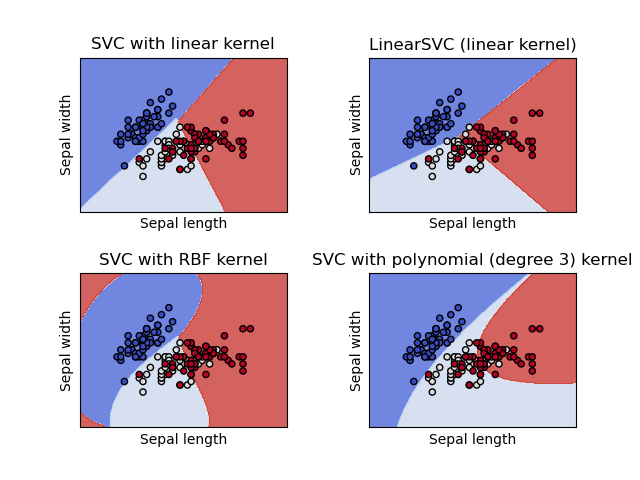

In [1]:
from IPython.display import Image
Image(r"C:\Users\marki\Downloads\svm.png")

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.svm import SVC

SVCclassifier = SVC()
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('accuracy is', SVCAcc)

Random Forest Classifier
consiste em um grande número de árvores de decisão individuais que operam como um conjunto. 
 Cada árvore individual na floresta aleatória exibe uma  previsão de classe e a classe com mais votos
 torna-se a previsão do nosso modelo. 


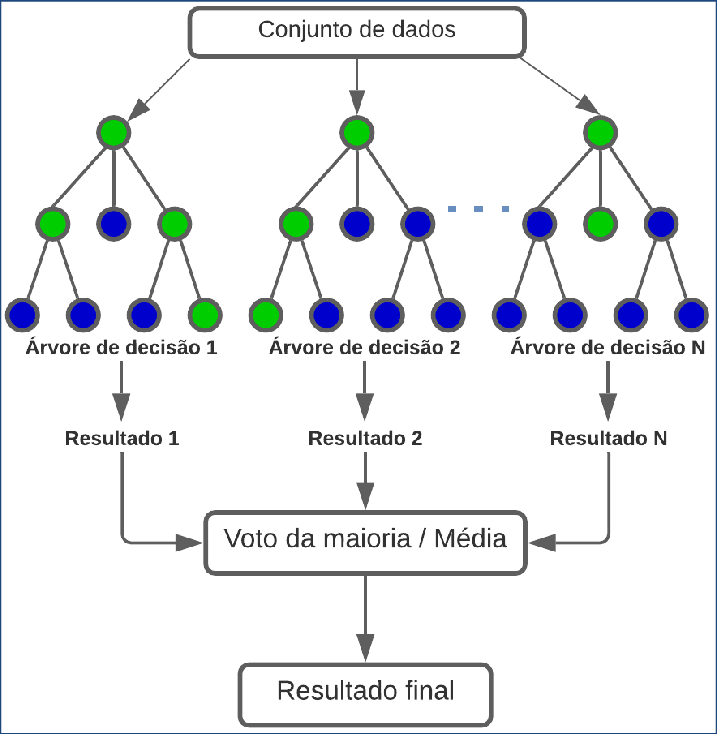

In [2]:
Image(r"C:\Users\marki\Downloads\floresta.png")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rdclassifier = RandomForestClassifier()
rdclassifier.fit(X_train, y_train)

y_pred = rdclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
rdfcc = accuracy_score(y_pred,y_test)
print('accuracy is', rdfcc)

Agora vamos comparar a acurácia dos três modelos estudados.

In [ ]:
comparação = pd.DataFrame({'Model': ['Logistic Regression', 'Support Vector Classifier', 'Random Forest Classifier'], 
                        'accuracy': [LRacc, SVCAcc ,rdfcc]})
comparação.sort_values(by='accuracy', ascending=True)

Apesar do ajuste no modelo de regressão logística, os outros dois modelos se adequaram melhor para a classificação
das espécies neste dataset, utilizando também menos dados de teste (20%).

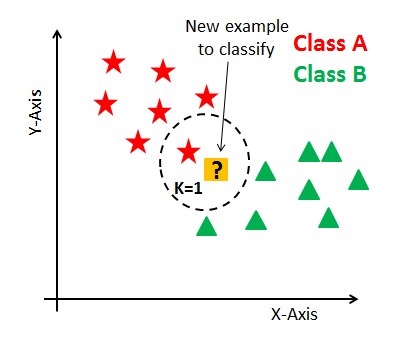

In [3]:
Image(r"C:\Users\marki\Downloads\knn.png")

Neighbours Classifier
Radius Neighbors is a classification machine learning algorithm.
   It is based on the k-nearest neighbors algorithm, or kNN. 
   kNN involves taking the entire training dataset and storing it.
   Then, at prediction time, the k-closest examples in the training 
   dataset are located for each new example for which we want to predict

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

KNclassifier = KNeighborsClassifier(n_neighbors=8)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('accuracy is', KNAcc)

Decision Tree

é um mapa dos possíveis resultados de uma série de escolhas relacionadas.
   Permite que um indivíduo ou organização compare possíveis ações com base 
   em seus custos, probabilidades e benefícios

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('accuracy is', DTAcc)

In [ ]:
comparação = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'SVC', 'K Neighbors Classifier', 'Gaussian NB'], 
                        'Accuracy': [LRAcc, DTAcc, SVCAcc , KNAcc, NBAcc]})
comparação.sort_values(by='Accuracy', ascending=False)

Gaussian NB
Naive Bayes classifier gives great results when we use it
   for textual data analysis. Such as Natural Language Processing.
   It works on conditional probability. Using the conditional probability, 
   we can calculate the probability of an event using its prior knowledge.

In [ ]:
from sklearn.naive_bayes import GaussianNB
NBclassifier = GaussianNB()
NBclassifier.fit(X_train, y_train)

y_pred = NBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc = accuracy_score(y_pred,y_test)
print('accuracy is', NBAcc)

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
print(KNclassifier.feature_importances_)